In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as const


from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rc('axes', linewidth=2)

matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
matplotlib.rcParams['font.weight']= 'bold'
# matplotlib.rcParams.update({'font.weight': 'bold'})
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

fs = 24 # fontsize for plots
rc('axes', linewidth=2)



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


%matplotlib inline
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
# %config InlineBackend.figure_format = 'retina'

import astropy.cosmology
from astropy import units
from astropy import constants as c
from astropy import units as u
import pycbc.conversions
import numpy
import h5py as h5

import pandas as pd



%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0.9.1


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:

BBHsGWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']
BBHsGWTC2 = ['GW190408_181802','GW190412','GW190413_052954','GW190413_134308','GW190421_213856',\
'GW190424_180648','GW190503_185404','GW190512_180714',\
'GW190513_205428','GW190514_065416','GW190517_055101','GW190519_153544','GW190521_074359',\
'GW190521','GW190527_092055','GW190602_175927','GW190620_030421','GW190630_185205','GW190701_203306',\
'GW190706_222641','GW190707_093326','GW190708_232457','GW190720_000836',\
'GW190727_060333','GW190728_064510','GW190731_140936','GW190803_022701','GW190828_063405',\
'GW190828_065509','GW190910_112807','GW190915_235702','GW190924_021846','GW190929_012149',\
 'GW190930_133541']

BHNSGWTC2 = ['GW190425', 'GW190814', 'GW190426_152155']
BNSGWTC1 = ['GW170817']
BNSGWTC2 = ['GW190425']

In [3]:



def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


In [19]:
def get_cosmology(cosmology=None, **kwargs):
    r"""Gets an astropy cosmology class.

    Parameters
    ----------
    cosmology : str or astropy.cosmology.FlatLambdaCDM, optional
        The name of the cosmology to use. For the list of options, see
        :py:attr:`astropy.cosmology.parameters.available`. If None, and no
        other keyword arguments are provided, will default to
        :py:attr:`DEFAULT_COSMOLOGY`. If an instance of
        :py:class:`astropy.cosmology.FlatLambdaCDM`, will just return that.
    \**kwargs :
        If any other keyword arguments are provided they will be passed to
        :py:attr:`astropy.cosmology.FlatLambdaCDM` to create a custom
        cosmology.

    Returns
    -------
    astropy.cosmology.FlatLambdaCDM
        The cosmology to use.

    Examples
    --------
    Use the default:

    >>> from pycbc.cosmology import get_cosmology
    >>> get_cosmology()
    FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307,
                  Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV,
                  Ob0=0.0486)

    Use properties measured by WMAP instead:

    >>> get_cosmology("WMAP9")
    FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K,
                  Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0463)

    Create your own cosmology (see :py:class:`astropy.cosmology.FlatLambdaCDM`
    for details on the default values used):

    >>> get_cosmology(H0=70., Om0=0.3)
    FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=0 K, Neff=3.04, m_nu=None,
                  Ob0=None)

    """
    if kwargs and cosmology is not None:
        raise ValueError("if providing custom cosmological parameters, do "
                         "not provide a `cosmology` argument")
    if isinstance(cosmology, astropy.cosmology.FlatLambdaCDM):
        # just return
        return cosmology
    if kwargs:
        cosmology = astropy.cosmology.FlatLambdaCDM(**kwargs)
    else:
        if cosmology is None:
            cosmology = DEFAULT_COSMOLOGY
        if cosmology not in astropy.cosmology.parameters.available:
            raise ValueError("unrecognized cosmology {}".format(cosmology))
        cosmology = getattr(astropy.cosmology, cosmology)
    return cosmology


def z_at_value(func, fval, unit, zmax=1000., **kwargs):
    r"""Wrapper around astropy.cosmology.z_at_value to handle numpy arrays.

    Getting a z for a cosmological quantity involves numerically inverting
    ``func``. The ``zmax`` argument sets how large of a z to guess (see
    :py:func:`astropy.cosmology.z_at_value` for details). If a z is larger than
    ``zmax``, this will try a larger zmax up to ``zmax * 10**5``. If that still
    is not large enough, will just return ``numpy.inf``.

    Parameters
    ----------
    func : function or method
        A function that takes redshift as input.
    fval : float
        The value of ``func(z)``.
    unit : astropy.unit
        The unit of ``fval``.
    zmax : float, optional
        The initial maximum search limit for ``z``. Default is 1000.
    \**kwargs :
        All other keyword arguments are passed to
        :py:func:``astropy.cosmology.z_at_value``.

    Returns
    -------
    float
        The redshift at the requested values.
    """
    fval, input_is_array = pycbc.conversions.ensurearray(fval)
    # make sure fval is atleast 1D
    if fval.size == 1 and fval.ndim == 0:
        fval = fval.reshape(1)
    zs = numpy.zeros(fval.shape, dtype=float)  # the output array
    for (ii, val) in enumerate(fval):
        try:
            zs[ii] = astropy.cosmology.z_at_value(func, val*unit, zmax=zmax,
                                                  **kwargs)
        except CosmologyError:
            # we'll get this if the z was larger than zmax; in that case we'll
            # try bumping up zmax later to get a value
            zs[ii] = numpy.inf
    # check if there were any zs > zmax
    replacemask = numpy.isinf(zs)
    # try bumping up zmax to get a result
    if replacemask.any():
        # we'll keep bumping up the maxz until we can get a result
        counter = 0  # to prevent running forever
        while replacemask.any():
            kwargs['zmin'] = zmax
            zmax = 10 * zmax
            idx = numpy.where(replacemask)
            for ii in idx:
                val = fval[ii]
                try:
                    zs[ii] = astropy.cosmology.z_at_value(
                        func, val*unit, zmax=zmax, **kwargs)
                    replacemask[ii] = False
                except CosmologyError:
                    # didn't work, try on next loop
                    pass
            counter += 1
            if counter == 5:
                # give up and warn the user
                logging.warning("One or more values correspond to a "
                                "redshift > {0:.1e}. The redshift for these "
                                "have been set to inf. If you would like "
                                "better precision, call God.".format(zmax))
                break
    return pycbc.conversions.formatreturn(zs, input_is_array)


def _redshift(distance, **kwargs):
    r"""Uses astropy to get redshift from the given luminosity distance.

    Parameters
    ----------
    distance : float
        The luminosity distance, in Mpc.
    \**kwargs :
        All other keyword args are passed to :py:func:`get_cosmology` to
        select a cosmology. If none provided, will use
        :py:attr:`DEFAULT_COSMOLOGY`.

    Returns
    -------
    float :
        The redshift corresponding to the given luminosity distance.
    """
    cosmology = get_cosmology(cosmology='WMAP9')
    return z_at_value(cosmology.luminosity_distance, distance, units.Mpc)

In [20]:
# GWTC -1: 




In [4]:
def chirpmass(m1, m2):
    numer = (m1*m2)**(3./5)
    denom = (m1+m2)**(1./5)
    
    return numer/denom


def obtainM1BHandM2BHassymetric(m1, m2):
    m1bh, m2bh = np.zeros_like(m1), np.zeros_like(m1)
    maskm1heavier = ( m1 >= m2)
    maskm2heavier = (m1 < m2)
    
    m1bh[maskm1heavier] = m1[maskm1heavier] 
    m1bh[maskm2heavier] = m2[maskm2heavier]
    m2bh[maskm1heavier] = m2[maskm1heavier]
    m2bh[maskm2heavier] = m1[maskm2heavier]
    
    return m1bh, m2bh # m1bh has all the heaviest systems



def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)




In [98]:




def calculate_credible_GW_intervals(GW_list=BBHsGWTC1, dfCSVname='/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation-/GW_credible_intervals/'):
    
    # the quantiles we want to obtain, here: the median & 90% credible interval
    # so we want quantiles 0.05, 0.5 and 0.95
    y_quantiles  =  [0.05,   0.5,    0.95]   
    indexnames   = ['unit',  '0.05',  '0.5',  '0.95']
    
    # prepare DataFrame 
    xvarHeaders = ['Mass1', 'Mass2', \
                    'TotMass', 'ChirpMass', 'q', 'spin1', 'spin2', 'final_spin', 'final_mass_source' ]

    xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#', '#', 'Msun']
    
    # ALL GWTC per catalog 
    GWTC1_BNS = ['GW170817']
    GWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170817',  'GW170818', 'GW170823']
    GWTC2 = ['GW190408_181802','GW190412','GW190413_052954','GW190413_134308','GW190421_213856',\
    'GW190424_180648','GW190503_185404','GW190512_180714',\
    'GW190513_205428','GW190514_065416','GW190517_055101','GW190519_153544','GW190521_074359',\
    'GW190521','GW190527_092055','GW190602_175927','GW190620_030421','GW190630_185205','GW190701_203306',\
    'GW190706_222641','GW190707_093326','GW190708_232457','GW190720_000836',\
    'GW190727_060333','GW190728_064510','GW190731_140936','GW190803_022701','GW190828_063405',\
    'GW190828_065509','GW190910_112807','GW190915_235702','GW190924_021846','GW190929_012149',\
     'GW190930_133541', 'GW190425', 'GW190814', 'GW190426_152155']
    
    
    
    
    for GW in GW_list:
        GW_ = str(GW)
        if GW in GWTC1:
            print(GW_)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+GW_+'_GWTC-1.hdf5'
            GW = h5.File(GW_file, 'r')
            # GW170817 does not have an overall posterior, but insteaad low & high spin. we choose low spin. 
            if GW_ in GWTC1_BNS:
                detM1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
                detM2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
                LDistance = GW['IMRPhenomPv2NRT_lowSpin_posterior']['luminosity_distance_Mpc']
                spin1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin1']
                spin2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin2']
                costilt1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt1']
                costilt2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
                
                final_spin = GW['IMRPhenomPv2NRT_lowSpin_posterior']['final_spin']
                final_mass_source = GW['IMRPhenomPv2NRT_lowSpin_posterior']['final_mass_source']
                
            else:
                detM1 = GW['Overall_posterior']['m1_detector_frame_Msun']
                detM2 = GW['Overall_posterior']['m2_detector_frame_Msun']
                LDistance = GW['Overall_posterior']['luminosity_distance_Mpc']
                spin1 = GW['Overall_posterior']['spin1']
                spin2 = GW['Overall_posterior']['spin2']
                costilt1 = GW['Overall_posterior']['costilt1']
                costilt2 = GW['Overall_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
                final_spin = GW['Overall_posterior']['final_spin']
                final_mass_source = GW['Overall_posterior']['final_mass_source']
            z_ = _redshift(LDistance)
            # convert to source frame masses
            M1 = detM1 / (1+z_)
            M2 = detM2 / (1+z_)
            
            mass_1_source = M1 
            mass_2_source = M2
            total_mass_source = M1+M2
            chirp_mass_source = chirpmass(M1, M2)
            symmetric_mass_ratio= M1 / M2
            


        
        
        elif GW in GWTC2:

            print(GW_)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-2_sample_release/' + GW_ +'_comoving.h5'
            GW = h5.File(GW_file, 'r')

            data = read(GW_file)
            samples_dict = data.samples_dict
            posterior_samples = samples_dict['PublicationSamples']
#             parameters = sorted(list(posterior_samples.keys()))

            mass_1_source = posterior_samples['mass_1_source']
            mass_2_source = posterior_samples['mass_2_source']
            total_mass_source = posterior_samples['total_mass_source']
            chirp_mass_source= posterior_samples['chirp_mass_source']
            spin1 = posterior_samples['spin_1z']
            spin2 = posterior_samples['spin_2z']
            # our mass ratio is defined the other way around
            symmetric_mass_ratio = mass_1_source / mass_2_source  # is the same as: posterior_samples['inverted_mass_ratio']
            

            final_spin = posterior_samples['final_spin']
            final_mass_source = posterior_samples['final_mass_source']            

    
    
        ###### write to csv file ######
        ######                   ######
    
        # nr of rows and columns that will be used:
        ncol_var = len(xvarHeaders)   
        ncol_Rate_det = 1

        nrows = len(y_quantiles) + 1 # +1 for units (see below)
        # store variables, and Observed and intrinsic rates for all MSSFR variations:
        ncol = ncol_var #* (ncol_MSSFR) # for each MSSFR I want to give quantiles for each xparam 
        df_placeholder = np.zeros((nrows, ncol)) # will be filled in loop: 

        headernames=[]
        units=[]
        for ind_s, ss in enumerate(xvarHeaders):
            sss = ss 
            headernames.append(sss)
            units.append(xvarUnits[ind_s])

        # store dataFrame with zeros that we will fill on the go:
        dfw = pd.DataFrame(data=df_placeholder, columns=headernames, index=indexnames)   
        # add units at first row (index=0)
        dfw.iloc[0]=units        



        # obtain BH and NS masses from combining GW posteriors.
        # by definition LIGO gives Most massive and least massive. 
        xvarlist = [mass_1_source, mass_2_source, total_mass_source, chirp_mass_source, symmetric_mass_ratio, spin1, spin2]


        # calculate quantiles with bootstrapping (if Nrepeats>1)
        for ind_xvar, xvar in enumerate(xvarlist):


                # calculate quantiles (credible intervals) from data 
                xvar_quantiles = weighted_quantile(values=xvar, quantiles=y_quantiles, \
                     sample_weight=np.ones_like(xvar))

                dfw_key = xvarHeaders[ind_xvar] 
                dfw[dfw_key][1:] = xvar_quantiles


        dfCSVname_ = dfCSVname + 'CredibleIntervals_' + GW_  + '.csv' 
        dfw.to_csv(dfCSVname_) 

        print('completed! credible intervals are ready ')
        
        
        
        
        
    return 
  

In [100]:
doGWTC1 = True
doGWTC2 = False 
doGW170817 = False
dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/' 


if doGWTC1:
    calculate_credible_GW_intervals(GW_list=BBHsGWTC1, dfCSVname=dfCSVname)

if doGWTC2: 
    calculate_credible_GW_intervals(GW_list=BBHsGWTC2, dfCSVname=dfCSVname)

if doGW170817:
    calculate_credible_GW_intervals(GW_list=BNSGWTC1, dfCSVname=dfCSVname)    
    
    

GW150914
completed! credible intervals are ready 
GW151012
completed! credible intervals are ready 
GW151226
completed! credible intervals are ready 
GW170104
completed! credible intervals are ready 
GW170608
completed! credible intervals are ready 
GW170729
completed! credible intervals are ready 
GW170809
completed! credible intervals are ready 
GW170814
completed! credible intervals are ready 
GW170818
completed! credible intervals are ready 
GW170823
completed! credible intervals are ready 


In [10]:
def schwarzschild_radius(mass_BH= 1*c.M_sun):
    
    r_s = 2 * c.G * mass_BH  / c.c**2
    
    return r_s.to(u.km)


print(schwarzschild_radius(mass_BH=1*c.M_sun))

2.95325007610025 km


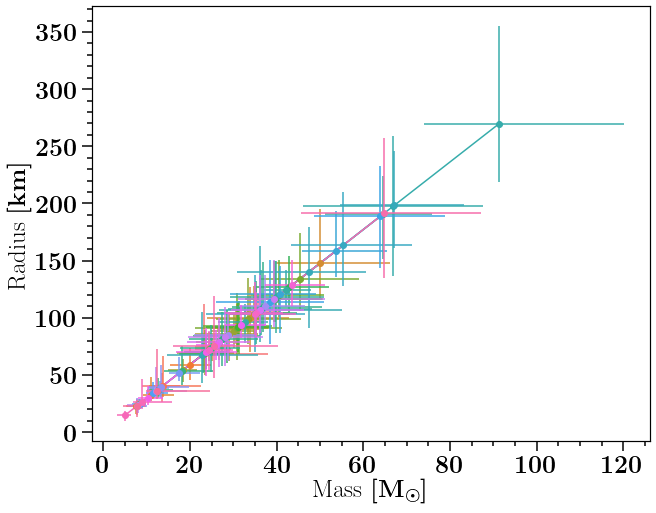

In [11]:
f, axe= plt.subplots(figsize=(10,8))
dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'


allGWs = np.concatenate((BBHsGWTC1, BBHsGWTC2))
colors = sns.color_palette("husl", len(allGWs))

for ind_GW, GW in enumerate(allGWs):
    
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)

    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
    R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
    R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
    R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))

    
    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)
    
    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
    R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
    R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))

    
    
    axe.errorbar(x=M1q0_5, y=R_s1.value, fmt='o',xerr=M1_err, yerr=R_s1_err, color=colors[ind_GW], zorder=11)
    axe.errorbar(x=M2q0_5, y=R_s2.value, fmt='o',xerr=M2_err, yerr=R_s2_err, color=colors[ind_GW], zorder=11)
    axe.plot([M1q0_5, M2q0_5], [R_s1.value, R_s2.value], color=colors[ind_GW], zorder=10)
    
    
xlabel = r'Mass  $[\rm{M}_{\odot}]$'
ylabel = r'Radius $[\rm{km}]$'
layoutAxes(axe, nameX=xlabel, nameY=ylabel)
plt.show()
# plt.errorbar

In [14]:
f, axe= plt.subplots(figsize=(10,8))
f_ind = 0


dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'
#xvarHeaders = ['Mass1', 'Mass2','TotMass', 'ChirpMass', 'q', 'spin1', 'spin2']
#xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#']

allGWs = np.concatenate((BBHsGWTC1, BBHsGWTC2))
colors = sns.color_palette("husl", len(allGWs))




for ind_GW, GW in enumerate(allGWs):
    
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
    spin1q0_05 = (df.iloc[0][5])# 
    spin1q0_5 = (df.iloc[1][5])# 
    spin1q0_95 = (df.iloc[2][5])# 
    
    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
    spin1_err = np.asarray(np.transpose([[spin1q0_5-spin1q0_05, spin1q0_95-spin1q0_5]]))

    
    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    spin2q0_05 = (df.iloc[0][6])# 
    spin2q0_5 = (df.iloc[1][6])# 
    spin2q0_95 = (df.iloc[2][6])# 
    
    
    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    spin2_err = np.asarray(np.transpose([[spin2q0_5-spin2q0_05, spin2q0_95-spin2q0_5]]))

    color_bk = 'lightgray'
    
    axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err,  color=color_bk, zorder=f_ind+1)
    axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err,  color=color_bk, zorder=f_ind+1)
    axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=color_bk, zorder=f_ind)
    
    
xlabel = r'Mass  $[\rm{M}_{\odot}]$'
ylabel = r'spin' # $[\rm{km}]$'
layoutAxes(axe, nameX=xlabel, nameY=ylabel)

axe.set_xlim(0,150)
axe.set_ylim(-1,1)


# save first one
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0) 
plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)




for ind_GW, GW in enumerate(allGWs):
    GW_ = str(GW)
    print(GW_)
    f_ind+=1
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
    spin1q0_05 = (df.iloc[0][5])# 
    spin1q0_5 = (df.iloc[1][5])# 
    spin1q0_95 = (df.iloc[2][5])# 
    
    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
    spin1_err = np.asarray(np.transpose([[spin1q0_5-spin1q0_05, spin1q0_95-spin1q0_5]]))

    
    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    spin2q0_05 = (df.iloc[0][6])# 
    spin2q0_5 = (df.iloc[1][6])# 
    spin2q0_95 = (df.iloc[2][6])# 
    
    
    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    spin2_err = np.asarray(np.transpose([[spin2q0_5-spin2q0_05, spin2q0_95-spin2q0_5]]))

    
    
    axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err, color=colors[ind_GW], zorder=f_ind+1)
    axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err, color=colors[ind_GW], zorder=f_ind+1)
    axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=colors[ind_GW], zorder=f_ind)
    axe.text(0.9, 0.9, s=GW_, rotation = 0, fontsize = 28, color = colors[ind_GW], ha = 'left', va='top', transform=axe.transAxes)#, weight = 'bold')

    plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    
    f_ind+=1 
    axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err,  color=color_bk, zorder=f_ind+1)
    axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err,  color=color_bk, zorder=f_ind+1)
    axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=color_bk, zorder=f_ind)  
    
    plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    



GW150914
GW151012
GW151226
GW170104
GW170608
GW170729
GW170809
GW170814
GW170818
GW170823
GW190408_181802


RuntimeError: latex was not able to process the following string:
b'GW190408_181802'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/floorbroekgaarden/.matplotlib/tex.cache/e06334a27f7fe438e17d937329bb8ed
2.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./e06334a27f7fe438e17d937329bb8ed2.aux)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...{28.000000}{35.000000}{\rmfamily GW190408_
                                                  181802}
No pages of output.
Transcript written on e06334a27f7fe438e17d937329bb8ed2.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd380c73170> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'GW190408_181802'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/floorbroekgaarden/.matplotlib/tex.cache/e06334a27f7fe438e17d937329bb8ed
2.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./e06334a27f7fe438e17d937329bb8ed2.aux)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...{28.000000}{35.000000}{\rmfamily GW190408_
                                                  181802}
No pages of output.
Transcript written on e06334a27f7fe438e17d937329bb8ed2.log.




RuntimeError: latex was not able to process the following string:
b'GW190408_181802'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/floorbroekgaarden/.matplotlib/tex.cache/e06334a27f7fe438e17d937329bb8ed
2.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./e06334a27f7fe438e17d937329bb8ed2.aux)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...{28.000000}{35.000000}{\rmfamily GW190408_
                                                  181802}
No pages of output.
Transcript written on e06334a27f7fe438e17d937329bb8ed2.log.




<Figure size 720x576 with 1 Axes>

In [13]:


BBHsGWTC1_names = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']
BBHsGWTC2_names = ['GW190408','GW190412',r'GW190413$\_$052954',r'GW190413$\_$134308','GW190421',\
'GW190424','GW190503','GW190512',\
'GW190513','GW190514','GW190517','GW190519','GW190521',\
'GW190521','GW190527','GW190602','GW190620','GW190630','GW190701',\
'GW190706','GW190707','GW190708','GW190720',\
'GW190727','GW190728','GW190731','GW190803','GW190828',\
'GW190828','GW190910','GW190915','GW190924','GW190929',\
 'GW190930']


GW_names = np.concatenate((BBHsGWTC1_names, BBHsGWTC2_names))




# PLOT MASS vs SPIN 

In [15]:
# f, axe= plt.subplots(figsize=(10,8))
f_ind = 0


dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'
#xvarHeaders = ['Mass1', 'Mass2','TotMass', 'ChirpMass', 'q', 'spin1', 'spin2']
#xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#']

allGWs = np.concatenate((BBHsGWTC1, BBHsGWTC2))
colors = sns.color_palette("husl", len(allGWs))









for ind_GW, GW in enumerate(allGWs):
    GW_ = str(GW)
    f, axe= plt.subplots(figsize=(10,8))
    for ind_GW_all, GW_all in enumerate(allGWs):
        

        dfname = dfCSVname + 'CredibleIntervals_' + GW_all  + '.csv' 
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


        M1q0_05 = (df.iloc[0][0])# [Msun]
        M1q0_5 = (df.iloc[1][0])# [Msun]
        M1q0_95 = (df.iloc[2][0])# [Msun]
        R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
        spin1q0_05 = (df.iloc[0][5])# 
        spin1q0_5 = (df.iloc[1][5])# 
        spin1q0_95 = (df.iloc[2][5])# 

        # absolute 90% credible interval
        M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
        spin1_err = np.asarray(np.transpose([[spin1q0_5-spin1q0_05, spin1q0_95-spin1q0_5]]))


        M2q0_05 = (df.iloc[0][1])# [Msun]
        M2q0_5 = (df.iloc[1][1])# [Msun]
        M2q0_95 = (df.iloc[2][1])# [Msun]
        spin2q0_05 = (df.iloc[0][6])# 
        spin2q0_5 = (df.iloc[1][6])# 
        spin2q0_95 = (df.iloc[2][6])# 


        # absolute 90% credible interval
        M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
        spin2_err = np.asarray(np.transpose([[spin2q0_5-spin2q0_05, spin2q0_95-spin2q0_5]]))

        color_bk = 'lightgray'

        axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err,  color=color_bk, zorder=f_ind+1)
        axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err,  color=color_bk, zorder=f_ind+1)
        axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=color_bk, zorder=f_ind+1)


    xlabel = r'Mass  $[\rm{M}_{\odot}]$'
    ylabel = r'spin' # $[\rm{km}]$'
    layoutAxes(axe, nameX=xlabel, nameY=ylabel)

    axe.set_xlim(0,120)
    axe.set_ylim(-1,1)


    # save first one
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0) 
    plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)    
    
    
    
    
    
    
    f_ind+=1
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
    spin1q0_05 = (df.iloc[0][5])# 
    spin1q0_5 = (df.iloc[1][5])# 
    spin1q0_95 = (df.iloc[2][5])# 
    
    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
    spin1_err = np.asarray(np.transpose([[spin1q0_5-spin1q0_05, spin1q0_95-spin1q0_5]]))

    
    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    spin2q0_05 = (df.iloc[0][6])# 
    spin2q0_5 = (df.iloc[1][6])# 
    spin2q0_95 = (df.iloc[2][6])# 
    
    
    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    spin2_err = np.asarray(np.transpose([[spin2q0_5-spin2q0_05, spin2q0_95-spin2q0_5]]))

    
    
    axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err, color=colors[ind_GW], zorder=f_ind+1)
    axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err, color=colors[ind_GW], zorder=f_ind+1)
    axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=colors[ind_GW], zorder=f_ind+1)
    axe.text(0.5, 0.95, s=GW_names[ind_GW], rotation = 0, fontsize = 28, color = colors[ind_GW], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')

    plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    
    f_ind+=1 
    plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.close()
#     axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err,  color=color_bk, zorder=f_ind+1)
#     axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err,  color=color_bk, zorder=f_ind+1)
#     axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=color_bk, zorder=f_ind)  
    
#     plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    



# SCHWARSCHILD RADIUS VS MASS 

In [65]:
# f, axe= plt.subplots(figsize=(10,8))
f_ind = 0


dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'
#xvarHeaders = ['Mass1', 'Mass2','TotMass', 'ChirpMass', 'q', 'spin1', 'spin2']
#xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#']

allGWs = np.concatenate((BBHsGWTC1, BBHsGWTC2))
colors = sns.color_palette("husl", len(allGWs))



def calculate_mile_lines(axe):
    axe.text(115, 25, s='radius Boston (25 miles)', rotation = 0, fontsize = 18, color = 'k', ha = 'right', va='bottom')    
    plt.plot([0,120], [25,25], lw=1, c='k', linestyle=':', zorder=0)

    
    axe.text(5, 200, s='distance Boston-NYC (200 miles)', rotation = 0, fontsize = 18, color = 'k', ha = 'left', va='bottom')    
    plt.plot([0,200], [200,200], lw=1, c='k', linestyle=':', zorder=0)
    
    
    return


mile = 0.621
ms = 7
cs=2


for ind_GW, GW in enumerate(allGWs):
    GW_ = str(GW)
    f, axe= plt.subplots(figsize=(10,8))
    calculate_mile_lines(axe)
    for ind_GW_all, GW_all in enumerate(allGWs):
        

        dfname = dfCSVname + 'CredibleIntervals_' + GW_all  + '.csv' 
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


        M1q0_05 = (df.iloc[0][0])# [Msun]
        M1q0_5 = (df.iloc[1][0])# [Msun]
        M1q0_95 = (df.iloc[2][0])# [Msun]
        R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
        
        R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
        R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
        R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))

        # absolute 90% credible interval
        M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))


        M2q0_05 = (df.iloc[0][1])# [Msun]
        M2q0_5 = (df.iloc[1][1])# [Msun]
        M2q0_95 = (df.iloc[2][1])# [Msun]
        R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)

        # absolute 90% credible interval
        M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
        R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
        R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
        R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))


        # absolute 90% credible interval
        M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))

        color_bk = 'lightgray'

        axe.errorbar(x=M1q0_5, y=R_s1.value*mile, fmt='o',xerr=M1_err, yerr=R_s1_err*mile,  color=color_bk, zorder=f_ind+1, markersize=ms, capsize=cs)
        axe.errorbar(x=M2q0_5, y=R_s2.value*mile, fmt='o',xerr=M2_err, yerr=R_s2_err*mile,  color=color_bk, zorder=f_ind+1, markersize=ms, capsize=cs)
        axe.plot([M1q0_5, M2q0_5], [R_s1.value*mile, R_s2.value*mile], color=color_bk, zorder=f_ind+1)


    xlabel = r'Black Hole Mass  [$\times$ mass sun]'
    ylabel = r'Black Hole Radius   [miles]'
    layoutAxes(axe, nameX=xlabel, nameY=ylabel)

    axe.set_xlim(0,120)
    axe.set_ylim(0,400*mile)

    
    


    
    

    # save first one
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0) 
    plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)    
    
    
    
    
    
    
    f_ind+=1
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
    R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
    R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
    R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))
    
    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))


    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)    
    R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
    R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
    R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))

    
    
    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    
    
    
    axe.errorbar(x=M1q0_5, y=R_s1.value*mile, fmt='o',xerr=M1_err, yerr=R_s1_err*mile, color=colors[ind_GW], zorder=f_ind+1, markersize=ms, capsize=cs)
    axe.errorbar(x=M2q0_5, y=R_s2.value*mile, fmt='o',xerr=M2_err, yerr=R_s2_err*mile, color=colors[ind_GW], zorder=f_ind+1, markersize=ms, capsize=cs)
    axe.plot([M1q0_5, M2q0_5], [R_s1.value*mile, R_s2.value*mile], color=colors[ind_GW], zorder=f_ind+1)
    axe.text(0.5, 0.95, s=GW_names[ind_GW], rotation = 0, fontsize = 28, color = colors[ind_GW], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
    
    plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
    
    f_ind+=1 
    plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.close()
#     axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err,  color=color_bk, zorder=f_ind+1)
#     axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err,  color=color_bk, zorder=f_ind+1)
#     axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=color_bk, zorder=f_ind)  
    
#     plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    

print(f_ind)

220


220
230


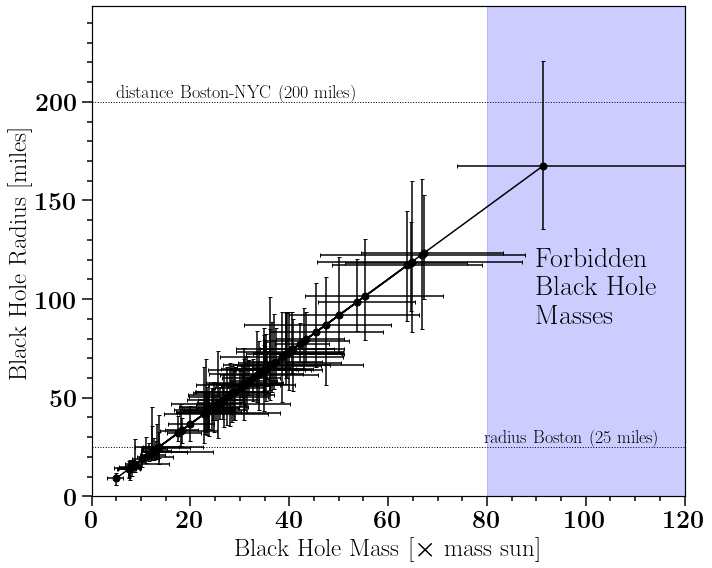

In [66]:


f, axe= plt.subplots(figsize=(10,8))
calculate_mile_lines(axe)

for ind_GW_all, GW_all in enumerate(allGWs):


    dfname = dfCSVname + 'CredibleIntervals_' + GW_all  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)

    R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
    R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
    R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))

    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))


    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)

    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
    R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
    R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))


    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))

    color_bk = 'lightgray'

    axe.errorbar(x=M1q0_5, y=R_s1.value*mile, fmt='o',xerr=M1_err, yerr=R_s1_err*mile,  color='k', zorder=f_ind+1, markersize=ms, capsize=cs)
    axe.errorbar(x=M2q0_5, y=R_s2.value*mile, fmt='o',xerr=M2_err, yerr=R_s2_err*mile,  color='k', zorder=f_ind+1, markersize=ms, capsize=cs)
    axe.plot([M1q0_5, M2q0_5], [R_s1.value*mile, R_s2.value*mile], color='k', zorder=f_ind+1)


xlabel = r'Black Hole Mass  [$\times$ mass sun]'
ylabel = r'Black Hole Radius   [miles]'
layoutAxes(axe, nameX=xlabel, nameY=ylabel)

axe.set_xlim(0,120)
axe.set_ylim(0,400*mile)








# save first one
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0) 
print(f_ind)
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)    

f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 



axe.fill_betweenx(y=[0,400], x1=80, x2=120, alpha=0.2, color='b')
axe.text(90, 85, s='Forbidden \n Black Hole \n Masses', rotation = 0, fontsize = 28, color = 'k', ha = 'left', va='bottom')
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)

f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 

plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs/img_'  + str(f_ind) + '.png', transparent=False)
print(f_ind)





In [57]:
# f, axe= plt.subplots(figsize=(10,8))
f_ind = 0


dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'
#xvarHeaders = ['Mass1', 'Mass2','TotMass', 'ChirpMass', 'q', 'spin1', 'spin2']
#xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#']

allGWs = np.concatenate((BBHsGWTC1, BBHsGWTC2))
colors = sns.color_palette("husl", len(allGWs))



def calculate_mile_lines(axe):
    axe.text(115, 10, s='diameter Amsterdam (10 km)', rotation = 0, fontsize = 18, color = 'k', ha = 'right', va='bottom')    
    plt.plot([0,120], [10,10], lw=1, c='k', linestyle=':', zorder=0)

    
    axe.text(5, 300, s='diameter Nederland (300 km)', rotation = 0, fontsize = 18, color = 'k', ha = 'left', va='bottom')    
    plt.plot([0,200], [300,300], lw=1, c='k', linestyle=':', zorder=0)
    
    
    return


mile = 1
ms = 7


for ind_GW, GW in enumerate(allGWs):
    GW_ = str(GW)
    f, axe= plt.subplots(figsize=(10,8))
    calculate_mile_lines(axe)
    for ind_GW_all, GW_all in enumerate(allGWs):
        

        dfname = dfCSVname + 'CredibleIntervals_' + GW_all  + '.csv' 
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


        M1q0_05 = (df.iloc[0][0])# [Msun]
        M1q0_5 = (df.iloc[1][0])# [Msun]
        M1q0_95 = (df.iloc[2][0])# [Msun]
        R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
        
        R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
        R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
        R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))

        # absolute 90% credible interval
        M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))


        M2q0_05 = (df.iloc[0][1])# [Msun]
        M2q0_5 = (df.iloc[1][1])# [Msun]
        M2q0_95 = (df.iloc[2][1])# [Msun]
        R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)

        # absolute 90% credible interval
        M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
        R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
        R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
        R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))


        # absolute 90% credible interval
        M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))

        color_bk = 'lightgray'

        axe.errorbar(x=M1q0_5, y=R_s1.value*mile, fmt='o',xerr=M1_err, yerr=R_s1_err*mile,  color=color_bk, zorder=f_ind+1, markersize=ms)
        axe.errorbar(x=M2q0_5, y=R_s2.value*mile, fmt='o',xerr=M2_err, yerr=R_s2_err*mile,  color=color_bk, zorder=f_ind+1, markersize=ms)
        axe.plot([M1q0_5, M2q0_5], [R_s1.value*mile, R_s2.value*mile], color=color_bk, zorder=f_ind+1)


    xlabel = r'Massa Zwarte Gat  [$\times$ massa Zon]'
    ylabel = r'Straal Zwarte Gat   [kilometer]'
    layoutAxes(axe, nameX=xlabel, nameY=ylabel)

    axe.set_xlim(0,120)
    axe.set_ylim(0,400*mile)

    
    


    
    

    # save first one
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0) 
    plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)    
    
    
    
    
    
    
    f_ind+=1
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)
    R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
    R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
    R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))
    
    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))


    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)    
    R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
    R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
    R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))

    
    
    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    
    
    
    axe.errorbar(x=M1q0_5, y=R_s1.value*mile, fmt='o',xerr=M1_err, yerr=R_s1_err*mile, color=colors[ind_GW], zorder=f_ind+1, markersize=ms)
    axe.errorbar(x=M2q0_5, y=R_s2.value*mile, fmt='o',xerr=M2_err, yerr=R_s2_err*mile, color=colors[ind_GW], zorder=f_ind+1, markersize=ms)
    axe.plot([M1q0_5, M2q0_5], [R_s1.value*mile, R_s2.value*mile], color=colors[ind_GW], zorder=f_ind+1)
    axe.text(0.5, 0.95, s=GW_names[ind_GW], rotation = 0, fontsize = 28, color = colors[ind_GW], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')
    
    plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
    
    f_ind+=1 
    plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.close()
#     axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err,  color=color_bk, zorder=f_ind+1)
#     axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err,  color=color_bk, zorder=f_ind+1)
#     axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=color_bk, zorder=f_ind)  
    
#     plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    

print(f_ind)

220


220
230


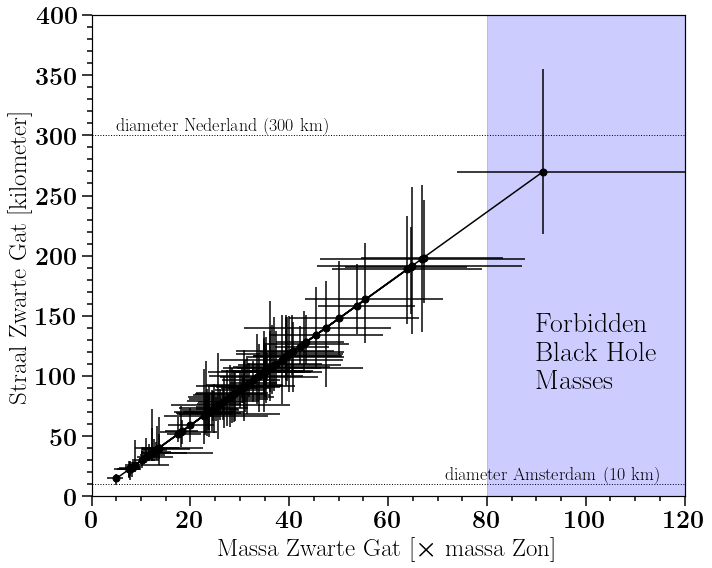

In [58]:


f, axe= plt.subplots(figsize=(10,8))
calculate_mile_lines(axe)

for ind_GW_all, GW_all in enumerate(allGWs):


    dfname = dfCSVname + 'CredibleIntervals_' + GW_all  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)

    R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
    R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
    R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))

    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))


    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)

    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
    R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
    R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))


    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))

    color_bk = 'lightgray'

    axe.errorbar(x=M1q0_5, y=R_s1.value*mile, fmt='o',xerr=M1_err, yerr=R_s1_err*mile,  color='k', zorder=f_ind+1, markersize=ms)
    axe.errorbar(x=M2q0_5, y=R_s2.value*mile, fmt='o',xerr=M2_err, yerr=R_s2_err*mile,  color='k', zorder=f_ind+1, markersize=ms)
    axe.plot([M1q0_5, M2q0_5], [R_s1.value*mile, R_s2.value*mile], color='k', zorder=f_ind+1)


# xlabel = r'Black Hole Mass  [$\times$ mass sun]'
# ylabel = r'Black Hole Radius   [miles]'
layoutAxes(axe, nameX=xlabel, nameY=ylabel)

axe.set_xlim(0,120)
axe.set_ylim(0,400*mile)








# save first one
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0) 
print(f_ind)
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)    

f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 



axe.fill_betweenx(y=[0,400], x1=80, x2=120, alpha=0.2, color='b')
axe.text(90, 85, s='Forbidden \n Black Hole \n Masses', rotation = 0, fontsize = 28, color = 'k', ha = 'left', va='bottom')
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)

f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 

plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
f_ind+=1 
plt.savefig('./movie_BHmass_Rs_NL/img_'  + str(f_ind) + '.png', transparent=False)
print(f_ind)





In [ ]:
Xray_catalog = ['MAXI J1820+070', '4U 1543-475', '1H 1659-487']


{'MAXI J1820+070':[8.40, -0.7, +0.77], '4U 1543-475':[9.4, -1, 1], '1H 1659-487':}

In [6]:
def ISCO_radius(m_bhtemp, Xefftemp):
    # this is prograde orbit
    # see also https://duetosymmetry.com/tool/kerr-isco-calculator/

    # everything in cgs
 
    Msun = c.M_sun 
    Rsun = c.R_sun     
    
    factorFront =   ((c.G*m_bhtemp)/c.c**2) #m_bhtemp #s
    
    Z1 = 1 + (1 - Xefftemp**2)**(1/3) * ((1 + Xefftemp)**(1/3) + (1 - Xefftemp)**(1/3) )
    Z2 = np.sqrt((3* Xefftemp**2 + Z1**2))
    
    Risco = factorFront * (3 + Z2 - np.sqrt((3-Z1)*(3+Z1 +2*Z2)))
    return Risco.to(u.km)




print(ISCO_radius(m_bhtemp=1*c.M_sun, Xefftemp=0.))





8.859750228300749 km


raddi
170.53618944215611 267.2858598608261 243.24756610138724
raddi
58.54954501382031 119.00887159243952 103.85224085892591
raddi
34.253995540684414 65.18735676625775 53.16361125556917
raddi
93.37198165636998 174.53472663632448 169.27946971213026
raddi
38.25389847956787 66.14242138829752 55.44954227188101
raddi
178.94982021787905 267.07971619733655 191.3665554379723
raddi
127.63571246162856 206.57999621600618 177.34222171659724
raddi
147.57657404019284 218.94765560514213 187.17277303667242
raddi
122.80383725954587 227.6678913340601 224.999527932049
raddi
141.11839715789384 253.21068734031942 209.73331407583325
raddi
103.22015073420752 162.51989391680388 150.28890932993397
raddi
51.594318714480885 70.92993861746326 54.27401433410681
raddi
103.19936744681972 206.77721908247634 189.30266153444208
raddi
124.24688938978322 271.62813412579646 264.10377310430783
raddi
135.9562713375398 272.6908218910802 268.0889796301512
raddi
165.6148824740319 265.6296918871768 220.71691724765503
raddi
128.8

NameError: name 'GW_names' is not defined

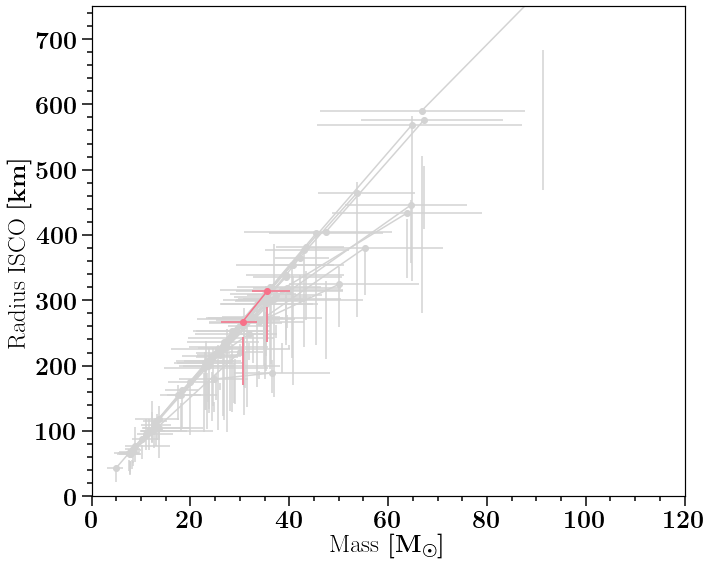

In [7]:
# f, axe= plt.subplots(figsize=(10,8))
f_ind = 0


dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'
#xvarHeaders = ['Mass1', 'Mass2','TotMass', 'ChirpMass', 'q', 'spin1', 'spin2']
#xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#']

allGWs = np.concatenate((BBHsGWTC1, BBHsGWTC2))
colors = sns.color_palette("husl", len(allGWs))









for ind_GW, GW in enumerate(allGWs):
    GW_ = str(GW)
    f, axe= plt.subplots(figsize=(10,8))
    for ind_GW_all, GW_all in enumerate(allGWs):
        

        dfname = dfCSVname + 'CredibleIntervals_' + GW_all  + '.csv' 
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


        M1q0_05 = (df.iloc[0][0])# [Msun]
        M1q0_5 = (df.iloc[1][0])# [Msun]
        M1q0_95 = (df.iloc[2][0])# [Msun]
        spin1q0_05 = (df.iloc[0][5])# 
        spin1q0_5 = (df.iloc[1][5])# 
        spin1q0_95 = (df.iloc[2][5])# 
        
        R1q0_5  = ISCO_radius(m_bhtemp=M1q0_5*c.M_sun, Xefftemp=spin1q0_5).value
        R1q0_05 = ISCO_radius(m_bhtemp=M1q0_05*c.M_sun, Xefftemp=spin1q0_05).value
        R1q0_95 = ISCO_radius(m_bhtemp=M1q0_95*c.M_sun, Xefftemp=spin1q0_95).value

        # absolute 90% credible interval
        M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
        R1_err = np.asarray(np.transpose([[R1q0_5-R1q0_05, R1q0_95-R1q0_5]]))


        M2q0_05 = (df.iloc[0][1])# [Msun]
        M2q0_5 = (df.iloc[1][1])# [Msun]
        M2q0_95 = (df.iloc[2][1])# [Msun]
        spin2q0_05 = (df.iloc[0][6])# 
        spin2q0_5 = (df.iloc[1][6])# 
        spin2q0_95 = (df.iloc[2][6])# 

        R2q0_5 = ISCO_radius(m_bhtemp=M2q0_5*c.M_sun, Xefftemp=spin2q0_5).value
        R2q0_05 = ISCO_radius(m_bhtemp=M2q0_05*c.M_sun, Xefftemp=spin2q0_05).value
        R2q0_95 = ISCO_radius(m_bhtemp=M2q0_95*c.M_sun, Xefftemp=spin2q0_95).value
        print('raddi')
        print(R2q0_05, R2q0_5, R2q0_95)
        
        # absolute 90% credible interval
        M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
        R2_err = np.asarray(np.transpose([[R2q0_5-R2q0_05, R2q0_95-R2q0_5]]))

        color_bk = 'lightgray'

        axe.errorbar(x=M1q0_5, y=R1q0_5, fmt='o',xerr=M1_err, yerr=R1_err,  color=color_bk, zorder=0)
        axe.errorbar(x=M2q0_5, y=R2q0_5, fmt='o',xerr=M2_err, yerr=R2_err,  color=color_bk, zorder=0)
        axe.plot([M1q0_5, M2q0_5], [R1q0_5, R2q0_5], color=color_bk, zorder=0)


    xlabel = r'Mass  $[\rm{M}_{\odot}]$'
    ylabel = r'Radius ISCO  $[\rm{km}]$'
    layoutAxes(axe, nameX=xlabel, nameY=ylabel)

    axe.set_xlim(0,120)
    axe.set_ylim(0,750)


    # save first one
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0) 
    plt.savefig('./movie_BHmass_RadiusISCO/img_'  + str(f_ind) + '.png', transparent=False)    
    
    
    
    
    
    
    f_ind+=1
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    spin1q0_05 = (df.iloc[0][5])# 
    spin1q0_5 = (df.iloc[1][5])# 
    spin1q0_95 = (df.iloc[2][5])# 

    R1q0_5 = ISCO_radius(m_bhtemp=M1q0_5*c.M_sun, Xefftemp=spin1q0_5).value
    R1q0_05 = ISCO_radius(m_bhtemp=M1q0_05*c.M_sun, Xefftemp=spin1q0_05).value
    R1q0_95 = ISCO_radius(m_bhtemp=M1q0_95*c.M_sun, Xefftemp=spin1q0_95).value

    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
    R1_err = np.asarray(np.transpose([[R1q0_5-R1q0_05, R1q0_95-R1q0_5]]))


    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    spin2q0_05 = (df.iloc[0][6])# 
    spin2q0_5 = (df.iloc[1][6])# 
    spin2q0_95 = (df.iloc[2][6])# 

    R2q0_5 = ISCO_radius(m_bhtemp=M2q0_5*c.M_sun, Xefftemp=spin2q0_5).value
    R2q0_05 = ISCO_radius(m_bhtemp=M2q0_05*c.M_sun, Xefftemp=spin2q0_05).value
    R2q0_95 = ISCO_radius(m_bhtemp=M2q0_95*c.M_sun, Xefftemp=spin2q0_95).value


    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    R2_err = np.asarray(np.transpose([[R2q0_5-R2q0_05, R2q0_95-R2q0_5]]))  
    
    axe.errorbar(x=M1q0_5, y=R1q0_5, fmt='o',xerr=M1_err, yerr=R1_err, color=colors[ind_GW], zorder=f_ind+100)
    axe.errorbar(x=M2q0_5, y=R2q0_5, fmt='o',xerr=M2_err, yerr=R2_err, color=colors[ind_GW], zorder=f_ind+100)
    axe.plot([M1q0_5, M2q0_5], [R1q0_5, R2q0_5], color=colors[ind_GW], zorder=f_ind+100)
    axe.text(0.5, 0.95, s=GW_names[ind_GW], rotation = 0, fontsize = 28, color = colors[ind_GW], ha = 'left', va='top', transform=axe.transAxes, weight = 'bold')

    plt.savefig('./movie_BHmass_RadiusISCO/img_'  + str(f_ind) + '.png', transparent=False)
    
    f_ind+=1 
    plt.savefig('./movie_BHmass_RadiusISCO/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_RadiusISCO/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.savefig('./movie_BHmass_RadiusISCO/img_'  + str(f_ind) + '.png', transparent=False)
    f_ind+=1 
    plt.close()
#     axe.errorbar(x=M1q0_5, y=spin1q0_5, fmt='o',xerr=M1_err, yerr=spin1_err,  color=color_bk, zorder=f_ind+1)
#     axe.errorbar(x=M2q0_5, y=spin2q0_5, fmt='o',xerr=M2_err, yerr=spin2_err,  color=color_bk, zorder=f_ind+1)
#     axe.plot([M1q0_5, M2q0_5], [spin1q0_5, spin2q0_5], color=color_bk, zorder=f_ind)  
    
#     plt.savefig('./movie_BHmass_spin/img_'  + str(f_ind) + '.png', transparent=False)
    

